In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_excel('88313_hmeq.xlsx', sheet_name='hmeq')

In [4]:
print('% of NAs in each column','\n', np.sum(df.isna())/len(df))

% of NAs in each column 
 BAD            0.000000
LOAN           0.000000
LOAN_bin       0.000000
MORTDUE        0.086913
MORTDUE_bin    0.000000
VALUE          0.018792
VALUE_bin      0.000000
REASON         0.042282
REASON_bin     0.000000
JOB            0.046812
JOB_bin        0.000000
YOJ            0.086409
YOJ_bin        0.000000
DEROG          0.118792
DEROG_bin      0.000000
DELINQ         0.097315
DELINQ_bin     0.000000
CLAGE          0.051678
CLAGE_TR       0.000000
NINQ           0.085570
NINQ_bin       0.000000
CLNO           0.037248
CLNO_bin       0.000000
DEBTINC        0.212584
DEBTINC_bin    0.000000
dtype: float64


In [5]:
df.columns

Index(['BAD', 'LOAN', 'LOAN_bin', 'MORTDUE', 'MORTDUE_bin', 'VALUE',
       'VALUE_bin', 'REASON', 'REASON_bin', 'JOB', 'JOB_bin', 'YOJ', 'YOJ_bin',
       'DEROG', 'DEROG_bin', 'DELINQ', 'DELINQ_bin', 'CLAGE', 'CLAGE_TR',
       'NINQ', 'NINQ_bin', 'CLNO', 'CLNO_bin', 'DEBTINC', 'DEBTINC_bin'],
      dtype='object')

In [6]:
drop = ['BAD', 'LOAN', 'MORTDUE', 'VALUE',
       'REASON', 'JOB', 'YOJ','DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC']

In [7]:
x = df.drop(drop, axis=1)
y = df.BAD

In [8]:
x.shape

(5960, 12)

In [9]:
x.columns

Index(['LOAN_bin', 'MORTDUE_bin', 'VALUE_bin', 'REASON_bin', 'JOB_bin',
       'YOJ_bin', 'DEROG_bin', 'DELINQ_bin', 'CLAGE_TR', 'NINQ_bin',
       'CLNO_bin', 'DEBTINC_bin'],
      dtype='object')

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [11]:
lor = LogisticRegression()

In [14]:
lor.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
prob = lor.predict_proba(x_test)

In [26]:
prob.shape

(1788, 2)

In [31]:
prob[:5]

array([[0.98128635, 0.01871365],
       [0.9736259 , 0.0263741 ],
       [0.80881718, 0.19118282],
       [0.98954885, 0.01045115],
       [0.97876727, 0.02123273]])

In [29]:
prob.argmax(axis = 1,)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
thre_40 = prob[:,1] > 0.4
thre_45 = prob[:,1] > 0.45
thre_50 = prob[:,1] > 0.5
thre_55 = prob[:,1] > 0.55
thre_60 = prob[:,1] > 0.60

In [76]:
from scikitplot.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import accuracy_score, precision_score

For threshold at 0.4 Accuracy is  0.8864653243847874


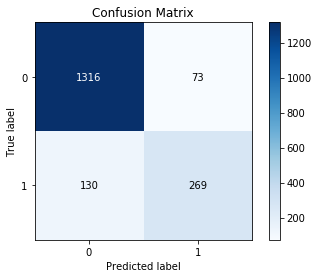

In [44]:
plot_confusion_matrix(y_test, thre_40)
print('For threshold at 0.4 Accuracy is ',accuracy_score(y_test, thre_40))

For threshold at 0.45 Accuracy is  0.889821029082774


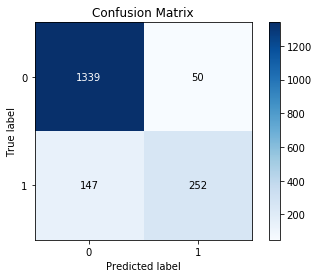

In [45]:
plot_confusion_matrix(y_test, thre_45)
print('For threshold at 0.45 Accuracy is ',accuracy_score(y_test, thre_45))

For threshold at 0.50 Accuracy is  0.8881431767337807


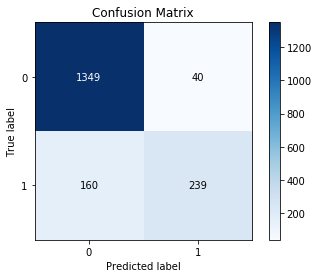

In [46]:
plot_confusion_matrix(y_test, thre_50)
print('For threshold at 0.50 Accuracy is ',accuracy_score(y_test, thre_50))

For threshold at 0.55 Accuracy is  0.8842281879194631


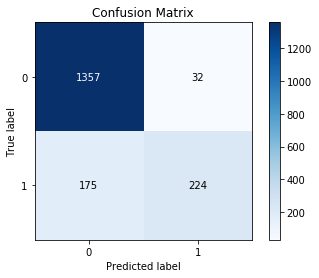

In [48]:
plot_confusion_matrix(y_test, thre_55)
print('For threshold at 0.55 Accuracy is ',accuracy_score(y_test, thre_55))

For threshold at 0.60 Accuracy is  0.8752796420581656


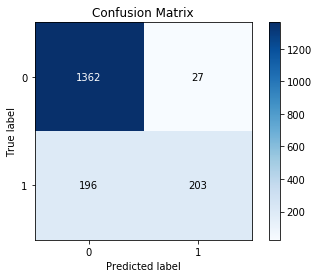

In [49]:
plot_confusion_matrix(y_test, thre_60)
print('For threshold at 0.60 Accuracy is ',accuracy_score(y_test, thre_60))

In [50]:
con = [y_test,prob,thre_40,thre_45,thre_50,thre_55,thre_60]

In [51]:
pd.concat(con, axis=1)

TypeError: cannot concatenate object of type "<class 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [58]:
idx = range(1,len(y_test)+1)

In [66]:
ytest = y_test.reset_index(drop=True)

In [67]:
out = pd.DataFrame([ytest, prob[:,1],thre_40, thre_45, thre_50, thre_55,thre_60]).T

In [69]:
out.columns = ['BAD','Probability','Thre_40','Thre_45', 'Thre_50','Thre_55','Thre_60']

In [71]:
accuracy_score(out.BAD, out.Thre_50)

0.8881431767337807

In [72]:
out.to_excel('hmeq_result.xlsx')

In [75]:
print(precision_score(y_test, thre_40))
print(precision_score(y_test, thre_45))
print(precision_score(y_test, thre_50))
print(precision_score(y_test, thre_55))
print(precision_score(y_test, thre_60))

0.7865497076023392
0.8344370860927153
0.8566308243727598
0.875
0.8826086956521739


C:\Users\Bestz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


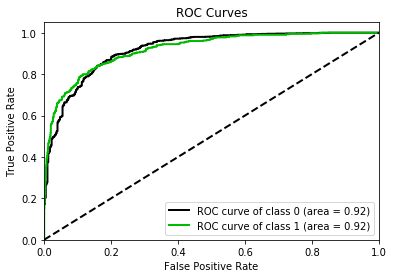

In [84]:
plot_roc_curve(y_test, prob,curves=('each_class'))

In [85]:
import lightgbm as lgb

In [86]:
model = lgb.LGBMClassifier(n_estimators=50, min_child_samples=10)

In [87]:
model.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=10,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=50,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [89]:
prob2 = model.predict_proba(x_test)

In [90]:
thre_50_lgb = prob2[:,1] > 0.5

In [91]:
accuracy_score(y_test, thre_50_lgb)

0.8942953020134228

In [92]:
pred2 = model.predict(x_test)

C:\Users\Bestz\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [93]:
accuracy_score(y_test, pred2)

0.8942953020134228

In [94]:
precision_score(y_test, pred2)

0.8620689655172413

In [95]:
import xgboost as xgb

In [96]:
model2 = xgb.XGBClassifier(max_depth=31, n_estimators=50)

In [97]:
model2.fit(x_train, y_train)
pred3 = model2.predict(x_test)

C:\Users\Bestz\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [98]:
accuracy_score(y_test, pred3)

0.8903803131991052

In [99]:
model2.feature_importances_

array([0.01973377, 0.05674918, 0.05114432, 0.04121906, 0.08664176,
       0.03981784, 0.03946754, 0.03993461, 0.4585474 , 0.10929472,
       0.04075199, 0.01669781], dtype=float32)

In [100]:
from fastai.structured import *

In [101]:
from fastai.metrics import *

In [102]:
??rf_feat_importance

Signature: rf_feat_importance(m, df)
Source:   
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
File:      c:\users\bestz\anaconda3\lib\site-packages\fastai\structured.py
Type:      function


In [104]:
fi = pd.DataFrame({'cols':x_train.columns, 'imp':model2.feature_importances_}).sort_values('imp', ascending=False)

In [105]:
fi

,cols,imp
8,CLAGE_TR,0.458547
9,NINQ_bin,0.109295
4,JOB_bin,0.086642
1,MORTDUE_bin,0.056749
2,VALUE_bin,0.051144
3,REASON_bin,0.041219
10,CLNO_bin,0.040752
7,DELINQ_bin,0.039935
5,YOJ_bin,0.039818
6,DEROG_bin,0.039468
